<a href="https://colab.research.google.com/github/easyhardhoon/machine_learning/blob/master/ML8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#계산 그래프

국소적 계산. 복잡한 계산도 분해하면 단순한 계산으로 구성된다

전체 계산이 아무리 복잡하더라도 각 단계에서 하는 일은 해당 노드의 국소적계산임

#계산 그래프의 이점

1. 국소적 계산. 복잡한 계산은 단순한 계산의 집합

2. 중간 계산 결과 보관 가능

3. 역전파를 통해 미분을 효율적으로 계산할 수 있음

즉 순전파와 역전파를 활용해서 각 변수의 미분을 효율적으로 구할 수 있다

# 연쇄법칙

합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다

ex) z = t^2 , t = x + y

이때 dz/dx = dz/dt * dt/dx 

dz/dt = 2t , dt/dx = 1 이므로

dz/dx = 2t = 2(x+y)


In [ ]:
# 오늘은 코드가 거의 없을 예정입니다. 역전파에 대한 개념 위주의 공부입니다.

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


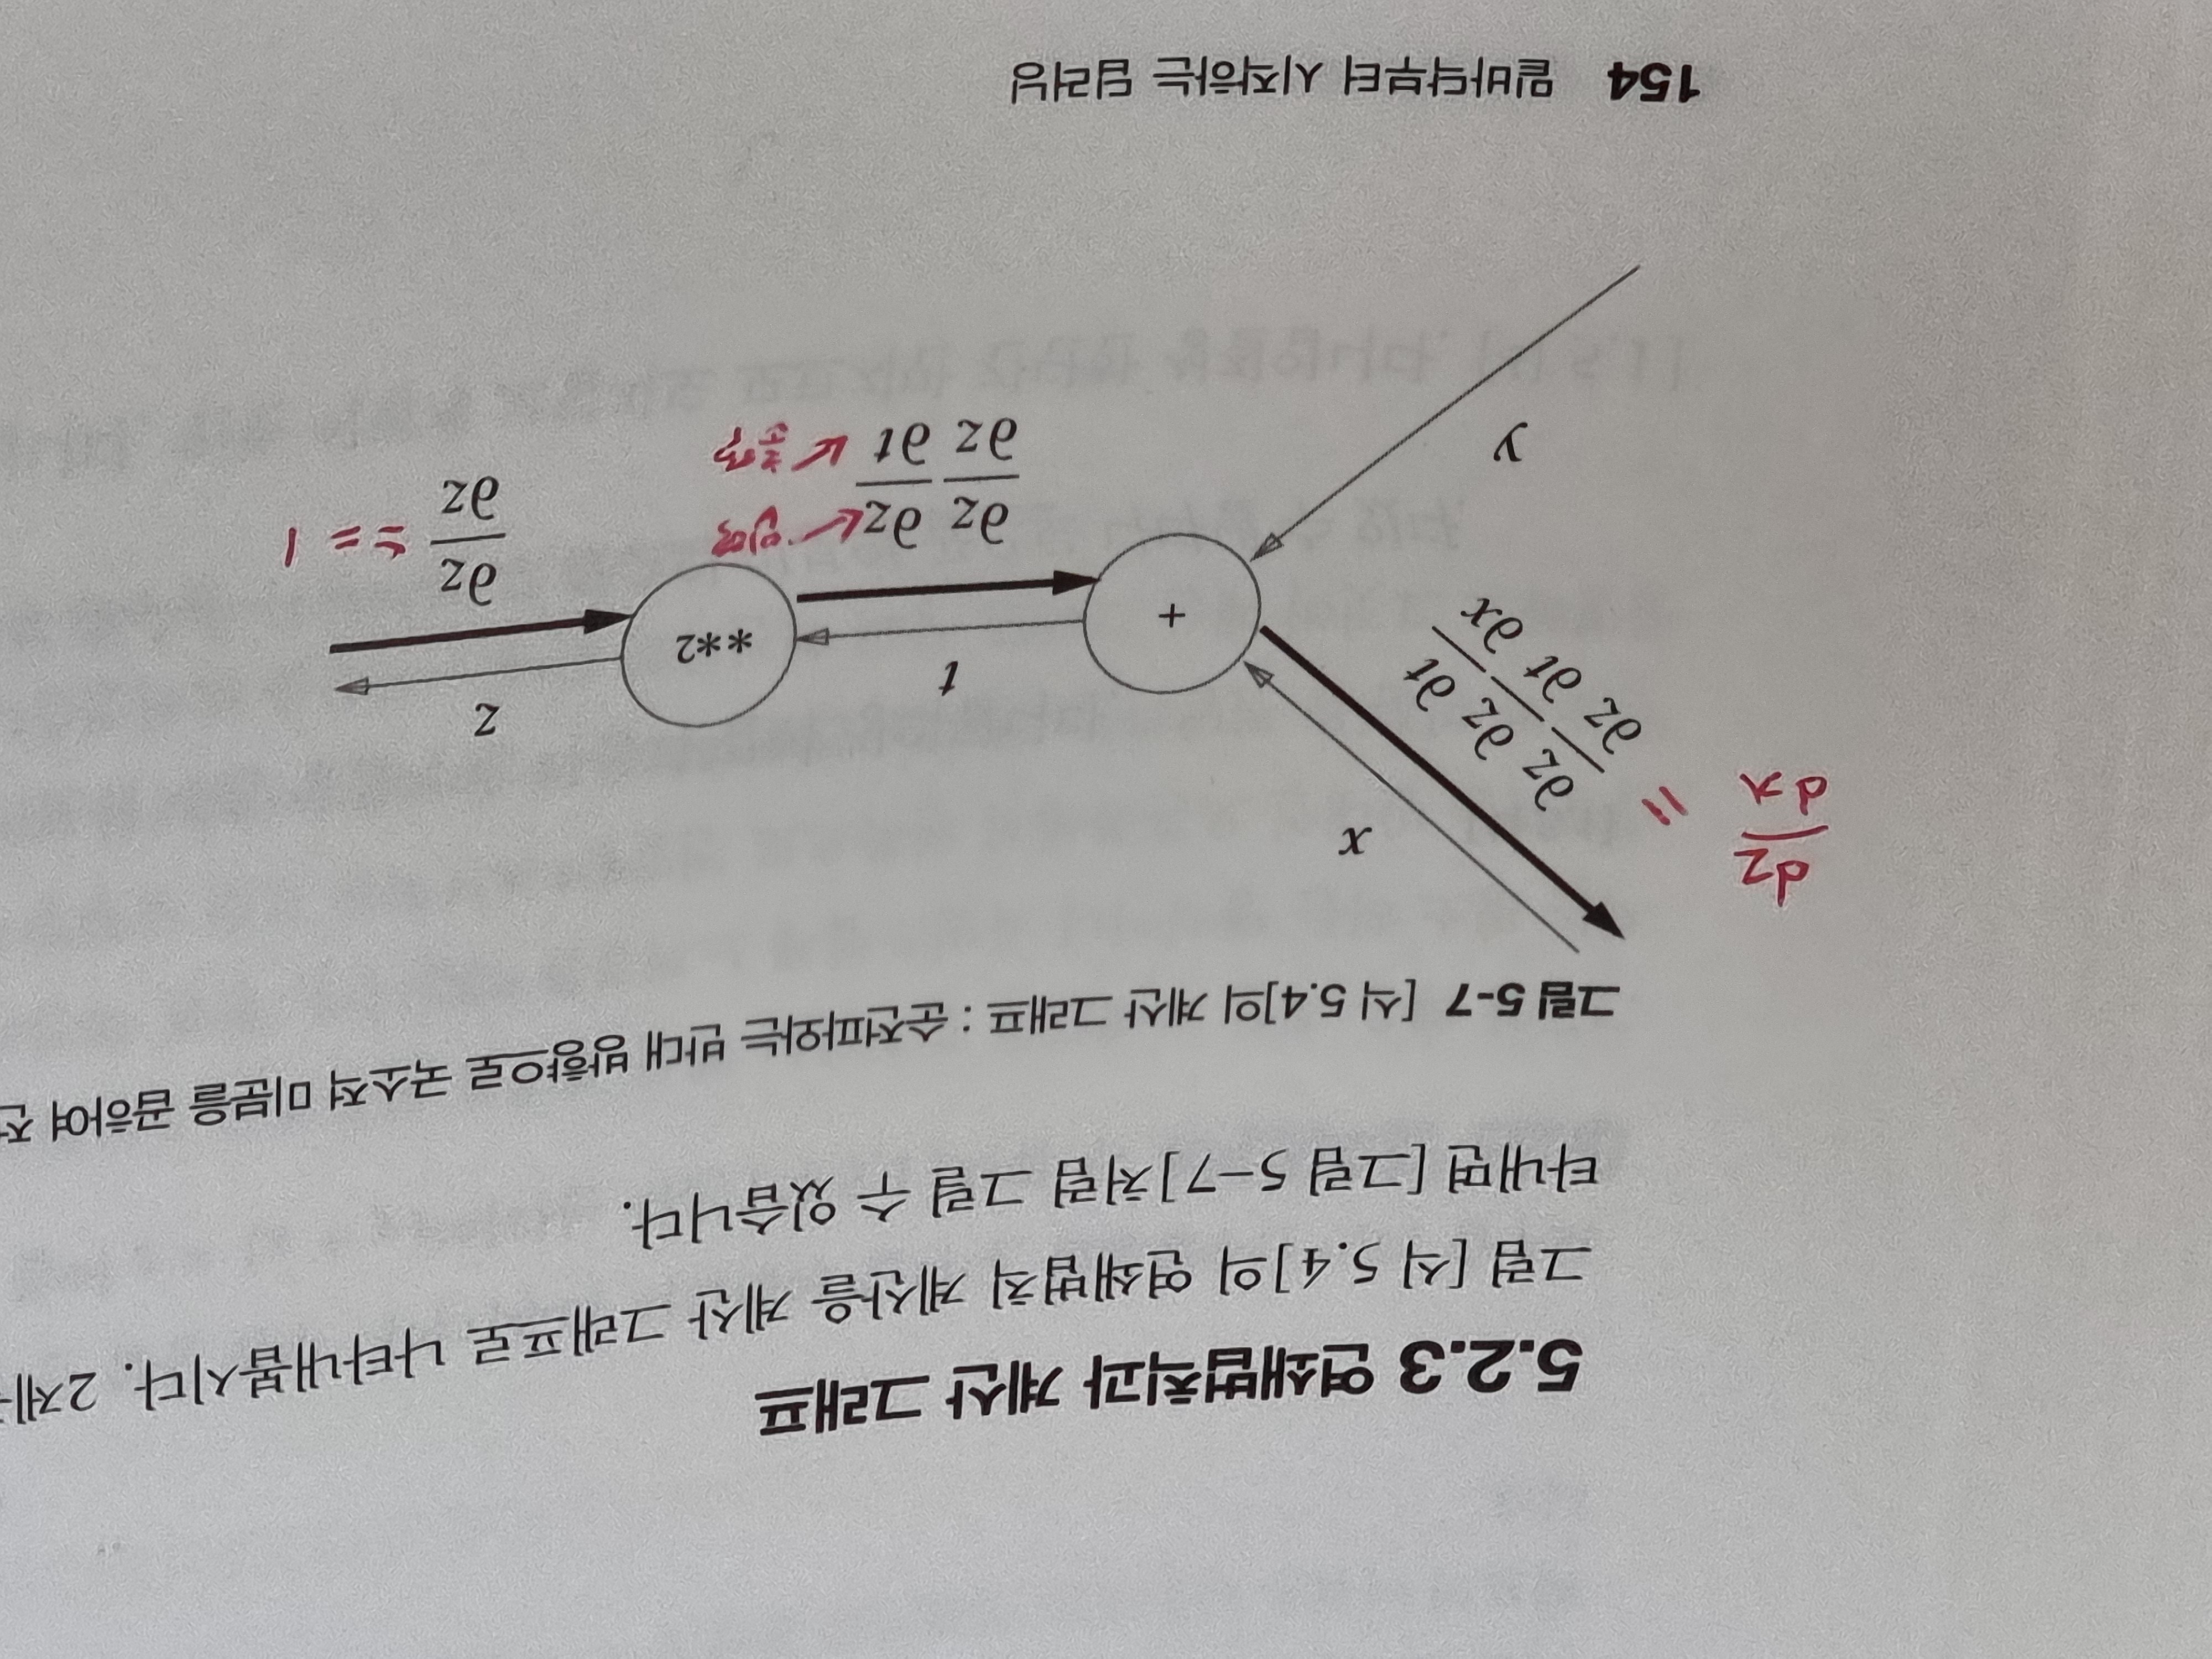

In [ ]:
from IPython.display import Image
Image('/gdrive/My Drive/test_t.jpg')
#참고용 사진입니다.

#사진에서 보면

노드로 들어온 입력 신호에 그 노드의 국소적 미분(편미분)을 곱한 후 다음 노드로 전달함

연쇄법칙에 따르면 결국 x에 대한 z의 미분만 남게 된다. 

즉 역전파가 하는 일은 연쇄 법칙의 원리와 같다

#덧셈 노드의 역전파

ex) z = x+ y 

dz/dx = dz/dy = 1 이므로 역전파의 개념으로 보면 입력으로 들어온 dL/dz를 그대로 다음 노드로 보낸다. 

#역전파의 개념--> 일단 입력 신호에 그 노드의 편미분을 곱해야함

덧셈 노드의 경우 순전파의 관점에서 보면 z = x + y 같은 식이다. 그러므로 편미분을 하게 되면 각각이 모두 1인 원리임

**즉, 덧셈 노드의 역전파는 입력된 값을 그대로 다음 노드로 보낸다**. 

#곱셈 노드의 역전파

ex) z = x * y 

dz/dx = y , dz/dy = x 이므로 

**즉, 곱셈 노드의 역전파는 상류의 값에 순전파 때의 입력 신호들을 서로 바꾼 값을 곱해서 하류로 보낸다**

#그래서

덧셈의 역전파에서는 상류의 값을 그대로 흘려보내기 때문에 순반향 입력 신호의 값은 필요하지 않다

하지만 곱셈의 역전파는 순방향 입력 신호의 값이 필요하다. 

그래서 곱셈 노드를 구현할때는 순전파의 입력 신호를 변수에 저장해 놓는다

#만약
3개의 변수(A,B,C)의 최종 결과가(역전파) 2.2, 110, 200 이라면

A,B의 값(ex 가격)이 같은 양만큼 오르면 같은순전파일떄의 최종결과값 (ex 최종금액)에는 

A가 2.2의 크기로 , B가 110의 크기로 영향을 준다고 해석가능 (대신 단위주의)



In [ ]:
#곱셈 노드 : MulLayer, 덧셈 노드 : AddLayer
class MulLayer:
  def __init__(self):
    self.x = None
    self.y = None # x, y는 순전파 시의 입력 값을 유지하기 위해 사용. 앞서 말한 곱셈 노드의 특징
  def forward(self, x, y): #순전파
    self.x = x
    self.y = y
    out = x * y
    return out
  def backward(self,dout): #역전파 . dout는 상류에서 넘어온 미분
    dx = dout * self.y
    dy = dout * self.x
    return dx,dy

In [ ]:
apple = 100
apple_num = 2
tax = 1.1

#계층들. 독립변수? 같은 느낌
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

#순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price,tax)
price

220.00000000000003

In [ ]:
#역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
dapple, dapple_num, dtax
#흐름을 이해하기. 인자 주의. 순전파의 출력에 대한 미분이 인수임.

(2.2, 110.00000000000001, 200)

In [ ]:
#덧셈 노드
class AddLayer:
  def __init__(self):
    pass #같은 맥락으로 덧셈 노드에서는 따로 인스턴스 변수를 저장해놓을 필요가 없다
  def forward(self,x,y):
    out = x + y
    return out
  def backward(self,dout):
    dx = dout * 1
    dy = dout * 1
    return dx,dy


In [ ]:
# 덧셈 계층 + 곱셈 계층 (이게 메인)
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

#계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

#순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

#역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)
#이처럼 계산 그래프에서의 계층(더하기,곱하기)은 쉽게 구현할 수 있으며 이를 이용해 복잡한 미분도 가능하다


715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


이제 계산 그래프를 신경망에 적용할 차례

기존의 계층은 단순 더하기나 곱하기 였지만 이제는 활성화함수가 도입됨.

이제 각 활성화 함수에 따른 계층구현을 해보겠습니다.


▶ 역전파의 개념 : 입력 신호 * 그 노드의 편미분임을 명심 
#1. Relu 계층

In [3]:
import numpy as np 
class Relu:
  def __init__(self):
    self.mask = None #넘파이 배열을 받는다고 가정했으므로, mask는 조건에 맞는 true/false 로 구성된 넘파이 배열임을 알 수 있다.
  def forward(self,x):
    self.mask = (x<= 0) #순전파 때의 입력값들 각각이 0이하면 mask 배열의 해당인덱스는 true가 된다. 아니면 false
    out = x.copy()
    out[self.mask] = 0 #x값이 0이하인 원소들은 결과값이 0이 되어야 하므로 앞선 mask로 인해 이 값들은 true가 되었다
    # false이면 그냥 넘어가고 true이면 해당 인덱스의 값은 0이 된다
    return out
  def backward(self,dout):
    dout[self.mask] = 0 #똑같이. x값이 0이하인 원소들은 미분값도 0이 되어 역전파의 개념에 의해 역전파의 결과값이 0이 되어야 하므로
    #  fasle이면 그냥 넘어가고 true이면 해당 인덱스의 값은 0이 된다. 
    #  같은 흐름의 x와 dout는 그 운명을 같이한다는 뜻을 이해하자.
    dx = dout
    return dx

순전파 때의 입력값이 0이하면 역전파 때의 값은 0이 되어야 한다

그래서 역전파 때는 순전파 때 만들어둔 mask를 써서 mask의 원소가 True인 곳에는

상류에서 전파된 dout를 0으로 설정한다. (ReLU는 계층은 스위치와 비슷한 역할)